In [1]:
import pandas as pd
from itertools import combinations
import math
import numpy as np
import statistics
from itertools import permutations
from bioinfokit import analys, visuz
import matplotlib.pyplot as plt

In [2]:
#pd.set_option('display.max_rows', 400)
data = pd.read_csv("cnvator_data_sudmant_overlapped.csv")


anotation = pd.read_csv('/branchinecta/jbazanwilliamson/SGDP_anotation.csv', sep=',', encoding='latin-1',  index_col=1)



#data['Chr']=pd.to_numeric(data.Chr)
data

,Sample_ID,Chr,Start_original,End_original,Start,End,SIZE,SCORE,RD,LENGHT,P-VALUE,GAUSSIAN
0,LP6005441-DNA_A01,1,231001,237900,228416,267160,3.0,duplication,2.089230,6900.0,0.000000e+00,5.215800e-35
1,LP6005441-DNA_A01,1,471201,551200,471226,471326,1.0,deletion,0.187758,80000.0,1.992160e-12,2.215930e+09
2,LP6005441-DNA_A01,1,723801,728100,712534,763301,3.0,duplication,1.594500,4300.0,1.120070e-02,1.742820e+09
3,LP6005441-DNA_A01,1,1010901,1014200,1009660,1015541,1.0,deletion,0.498249,3300.0,5.434590e-04,2.196950e+09
4,LP6005441-DNA_A01,1,4124201,4127700,4120597,4131559,1.0,deletion,0.505571,3500.0,4.553500e-11,2.217790e-35
...,...,...,...,...,...,...,...,...,...,...,...,...
256113,SS6004480,X,153459601,153466400,153408881,153523661,3.0,duplication,1.882080,6800.0,3.234320e-09,7.076210e+01
256114,SS6004480,X,153474401,153496200,153408881,153523661,3.0,duplication,1.734000,21800.0,0.000000e+00,2.123580e+09
256115,SS6004480,X,153498901,153518500,153408881,153523661,3.0,duplication,1.886020,19600.0,0.000000e+00,2.117350e+07
256116,SS6004480,X,154798801,154804000,154789310,154826421,1.0,deletion,0.315173,5200.0,3.064860e-11,2.713240e+05


In [3]:
cnv = data.pivot_table(index=["Chr", "Start", "End"], 
                    columns='Sample_ID', 
                    values='RD').reset_index()
cnv.loc[cnv['Chr'] == '8']

Sample_ID,Chr,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,...,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
7314,8,328860,335939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7315,8,593901,599598,0.000000,0.000513,NaN,0.000000,0.45164,NaN,0.408189,...,0.522202,NaN,NaN,0.001043,0.512552,0.486635,0.127359,0.495626,0.511263,NaN
7316,8,973671,986606,NaN,NaN,0.464672,0.479631,NaN,0.451451,0.330004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7317,8,1233318,1236113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7318,8,1304525,1307677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,8,145534576,145536377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7791,8,145616372,145619289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.298549
7792,8,145701887,145708679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7793,8,146195179,146224164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
coordinates = cnv.iloc[:,0:2]
cnvs = cnv.iloc[:,3:284]
cnvs = cnvs.T
cnvs = cnvs.fillna(2)
cnvs

,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
Sample_ID,,,,,,,,,,,,,,,,,,,,,
LP6005441-DNA_A01,2.089230,0.187758,1.594500,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,2.000000
LP6005441-DNA_A03,1.098060,0.795844,2.104280,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.563718,0.563718,2.0,0.532579
LP6005441-DNA_A04,1.088959,0.089448,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.062768,0.062768,2.0,2.000000
LP6005441-DNA_A05,1.945120,0.000136,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,1.61902,2.000000,2.000000,2.0,2.0,0.118046,0.118046,2.0,2.000000
LP6005441-DNA_A06,1.743018,0.002116,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.097334,0.097334,2.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS6004476,2.087340,0.000687,2.417060,2.0,2.0,2.0,1.46004,2.0,2.0,0.401630,...,2.00000,2.00000,0.162154,0.162154,2.0,2.0,0.167378,0.167378,2.0,2.000000
SS6004477,0.971431,0.289939,2.417685,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,0.009885
SS6004478,1.032574,0.088507,2.628050,2.0,2.0,2.0,2.00000,2.0,2.0,0.307040,...,0.53303,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,0.001413


In [5]:
features = anotation.loc[:,["7-Gender","10-Region", "11-Country",]]
dt = features.merge(cnvs, left_index=True, right_index=True)
dt


,7-Gender,10-Region,11-Country,0,1,2,3,4,5,6,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
LP6005443-DNA_B06,F,WestEurasia,Iceland,0.817642,0.001244,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.561189,0.561189,2.0,0.562057
LP6005442-DNA_D08,F,WestEurasia,Iceland,1.859167,0.000993,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.059140,0.059140,2.0,2.000000
LP6005441-DNA_D07,F,SouthAsia,Pakistan,1.179241,0.000969,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.056002,0.056002,2.0,2.000000
LP6005441-DNA_C07,M,SouthAsia,Pakistan,1.655738,0.218862,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.097988,0.097988,2.0,2.000000
LP6005442-DNA_G11,M,Africa,SierraLeone,1.843697,0.014349,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,2.000000,2.000000,2.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP6005441-DNA_H10,F,WestEurasia,Russia,1.012276,0.104367,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.57277,2.0,2.0,2.000000,0.061955,0.061955,2.0,2.000000
LP6005519-DNA_A06,M,EastAsia,Myanmar,1.066221,0.026512,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,2.000000,2.000000,2.0,0.000000
LP6005519-DNA_B06,M,EastAsia,Myanmar,1.153741,0.077673,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.120404,0.120404,2.0,2.000000
LP6005441-DNA_B08,F,Africa,Congo,1.471292,0.069253,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,0.010136,2.000000,2.000000,2.0,2.000000


In [9]:
def vst_statistic(data):
    ####### Data frame with features ######
    dt = data.copy()
    dt = dt.groupby('10-Region')
    
    
    ####### Groupby regions #######
    dt_groupped = []
    regions = anotation['10-Region'].unique()
    for i in regions:
        dt_groupped.append(dt.get_group(str(i)))
    ######## V = within-population variance ######
    v = []
    for i in dt_groupped:
        v.append((i.var()))#You can add log2 transformation here as np.log2(i.var())
        
    ########### N =  numbers of individuals sampled from population each cnv ##############
    n = dt.count()
    n = n.drop(columns=['7-Gender', '11-Country'])
    n = n.reindex(regions)
    n = np.array(n)
    
    ######## Vt = total variance across all individuals of the pair of populations ########
    vt = []
    combination_regions = list(combinations([0,1,2,3,4,5,6],2))
    for i in combination_regions:
        pair_populations = pd.concat([dt_groupped[i[0]],dt_groupped[i[1]]])# dt_groupped[i[0]]+dt_groupped[i[1]]
        vt.append(pair_populations.var())

    ########## Vs ################## 
    ### Vs = (V1*n1+V2*n2)/(n1+n2) 
    ## where V1 is the within-population variance of population 1, 
    ## V2 is the within population variance of population 2, 
    #n1 and n2 are the numbers of individuals sampled from population 1 and 2, respectively.
    vs = []
    for i in combination_regions:
        v1 = v[i[0]]*n[i[0]]
        v2 = v[i[1]]*n[i[1]]
        ns = n[i[0]]+n[i[1]]
        vs_formula = (v1+v2)/ ns
        vs.append(vs_formula)
     
    ########## Vst #################
    #####(VT−VS)/VT
    vst = []
    for i in range(21):
        vst.append(((vt[i])-(vs[i]))/(vt[i]))
        
    vst_dt = np.array(vst)
    
    vst_dt = pd.DataFrame(vst_dt)
    
    #### ADD pair-population names #####
    
    combination_names = []
    for i in list(combinations(regions,2)):
        combination_names.append(i[0]+str('-')+i[1])
    
    vst_dt = vst_dt.set_axis(combination_names)
    vst_dt = vst_dt.T
    
    return(vst_dt)


In [7]:
vst_dt = vst_statistic(dt)
vst_dt

,WestEurasia-SouthAsia,WestEurasia-Africa,WestEurasia-CentralAsiaSiberia,WestEurasia-Oceania,WestEurasia-America,WestEurasia-EastAsia,SouthAsia-Africa,SouthAsia-CentralAsiaSiberia,SouthAsia-Oceania,SouthAsia-America,...,Africa-CentralAsiaSiberia,Africa-Oceania,Africa-America,Africa-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-America,CentralAsiaSiberia-EastAsia,Oceania-America,Oceania-EastAsia,America-EastAsia
0,-8.593023e-03,-3.078995e-04,1.590519e-02,1.829981e-02,-7.095543e-03,-8.454674e-03,-4.526558e-03,1.794908e-02,2.307604e-02,-1.259478e-02,...,-4.206908e-03,5.935332e-02,-0.019569,-1.040750e-03,1.004780e-01,-1.725409e-02,0.020363,4.087170e-02,0.016278,-8.762148e-03
1,-3.174611e-03,7.340269e-02,-1.537713e-02,-5.040241e-03,3.033296e-02,-8.609495e-03,1.029663e-01,-9.904839e-03,-1.581952e-02,5.448183e-02,...,2.417622e-02,1.374525e-01,0.009537,6.341611e-02,-1.186233e-02,5.659247e-03,-0.017104,7.966812e-02,-0.004577,2.552164e-02
2,-3.872420e-03,3.787762e-02,4.081844e-03,3.318657e-03,3.173556e-02,-5.738733e-03,7.345592e-02,2.582915e-02,2.273688e-02,7.328414e-02,...,3.585976e-03,-1.710461e-02,-0.012449,4.323801e-02,-1.916563e-02,8.515374e-03,0.011379,-1.816570e-02,0.012570,3.594532e-02
3,-6.130041e-03,5.053157e-15,5.557855e-03,-1.175073e-15,3.288834e-16,4.986972e-03,8.590804e-03,-8.869998e-03,6.212340e-03,5.886396e-03,...,2.413256e-02,NaN,NaN,2.235318e-02,1.853422e-02,1.771243e-02,-0.014262,NaN,0.015832,1.495881e-02
4,-8.709181e-03,-8.967584e-03,-1.209543e-02,2.708671e-03,-9.768168e-03,-6.176460e-03,-1.129511e-02,-1.669108e-02,5.369928e-03,-1.297674e-02,...,-1.430115e-02,-9.522097e-16,-0.009624,-7.969240e-03,3.391911e-15,-1.479776e-02,-0.014897,1.419297e-15,0.007843,-1.547458e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,-9.167350e-03,1.346475e-02,3.714710e-03,3.405145e-03,3.187791e-03,5.309775e-03,1.051255e-02,-8.094298e-16,-4.415071e-16,-1.282473e-15,...,3.485870e-02,3.245360e-02,0.030719,4.616326e-02,NaN,NaN,NaN,NaN,NaN,NaN
8646,-9.280458e-03,4.136516e-02,-8.619080e-04,1.427378e-01,-1.000542e-02,-3.587502e-03,3.711076e-02,-4.001814e-03,1.653375e-01,-1.574038e-02,...,8.704138e-02,3.493116e-02,0.040547,7.830188e-02,2.745614e-01,-1.340762e-02,-0.012748,2.055983e-01,0.231411,-1.315259e-02
8647,-9.252304e-03,4.014486e-02,-5.129898e-04,1.402814e-01,-9.872710e-03,-3.292505e-03,3.711076e-02,-4.001814e-03,1.653375e-01,-1.574038e-02,...,8.704138e-02,3.493116e-02,0.040547,7.830188e-02,2.745614e-01,-1.340762e-02,-0.012748,2.055983e-01,0.231411,-1.315259e-02
8648,-1.333817e-14,2.181402e-03,-1.296488e-14,2.747309e-15,-1.063121e-02,-5.311661e-15,-3.393897e-16,NaN,NaN,-2.903604e-15,...,7.741901e-16,7.414779e-16,0.004059,-2.085407e-15,NaN,-2.021416e-15,NaN,-2.481550e-15,NaN,4.747313e-15


In [8]:
## Coordinates anotation 
vst_dt.insert (0, 'chr', cnv['Chr'])
vst_dt.insert (1, 'start', cnv['Start'])
vst_dt.insert (2, 'end', cnv['End'])
vst_dt = vst_dt.round(5)

In [11]:
vst_dt.sort_values(by='WestEurasia-Oceania', ascending=False).head(20)
#vst_dt.loc[2148]

,chr,start,end,WestEurasia-SouthAsia,WestEurasia-Africa,WestEurasia-CentralAsiaSiberia,WestEurasia-Oceania,WestEurasia-America,WestEurasia-EastAsia,SouthAsia-Africa,...,Africa-CentralAsiaSiberia,Africa-Oceania,Africa-America,Africa-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-America,CentralAsiaSiberia-EastAsia,Oceania-America,Oceania-EastAsia,America-EastAsia
4519,21,23654416,23666937,0.04289,0.04945,0.44385,0.63858,-0.00716,0.39917,0.17641,...,0.70873,0.90878,0.03272,0.56064,0.09093,0.50367,-0.01034,0.75714,0.09095,0.36063
8456,X,93395090,93408524,0.01754,0.00335,0.00000,0.58851,NaN,0.05579,-0.00416,...,-0.01507,0.51391,0.00180,0.02050,0.45734,0.00000,0.00825,0.47822,0.36155,0.03025
5207,3,177002636,177011374,NaN,NaN,NaN,0.53013,NaN,NaN,NaN,...,NaN,0.49270,NaN,NaN,0.44402,NaN,NaN,0.41963,0.49646,NaN
7675,8,112293525,112300229,0.21491,0.38855,0.37060,0.51954,0.28826,0.44550,0.02357,...,-0.01471,0.01080,-0.00722,-0.00956,0.00558,-0.01109,-0.01362,0.04980,0.00094,0.00251
748,10,27638079,27642286,-0.00546,0.02725,0.13630,0.46267,-0.00581,0.19102,0.00263,...,0.02762,0.28607,-0.00580,0.05943,0.12643,0.06954,-0.01064,0.38877,0.08048,0.09082
925,10,91998319,92002307,0.02848,-0.00098,0.01141,0.44891,0.00980,-0.00593,0.05801,...,0.00000,0.50056,0.00000,0.00821,0.49288,NaN,0.02608,0.46807,0.40601,0.02291
4830,3,32101863,32119604,0.02029,0.35668,-0.00869,0.44360,0.01547,0.12754,0.21680,...,0.29148,0.00509,0.42309,0.07444,0.46474,0.04001,0.08287,0.66487,0.15084,0.19427
1604,12,45899329,45910710,0.29528,0.00649,0.07474,0.42419,0.23189,0.50972,0.19692,...,0.01967,0.36161,0.15957,0.41890,0.28388,0.06011,0.30143,0.11149,0.00000,0.09157
177,1,62642084,62656768,0.00746,-0.00541,0.30932,0.42168,0.28652,0.21423,0.01811,...,0.33217,0.44501,0.31920,0.21102,0.00354,-0.02129,-0.00655,0.00403,0.03550,-0.00993
1108,11,21847054,21849813,-0.00462,-0.00065,-0.00184,0.41310,0.02664,-0.00212,0.01200,...,-0.01474,0.34324,0.06161,0.01733,0.31781,0.07530,0.01747,0.56243,0.49723,0.01487


In [12]:
#### SAVING VST FILE
vst_dt.to_csv('vst_results.csv')

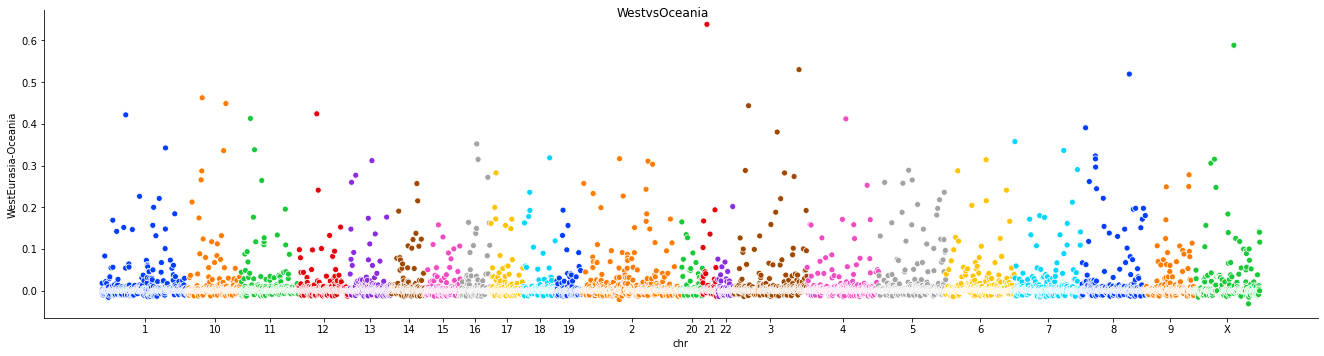

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import uniform, randint

# Simulate DataFrame
vst_dt['i']= vst_dt.index
#vst_dt['log_West_Oceania'] = np.log2(vst_dt['WestEurasia-Oceania'])

# Generate Manhattan plot: (#optional tweaks for relplot: linewidth=0, s=9)
plot = sns.relplot(data=vst_dt, x='i', y='WestEurasia-Oceania', aspect=3.7, 
                  hue='chr', palette = 'bright', legend=None) 
chrom_df=vst_dt.groupby('chr')['i'].median()
plot.ax.set_xlabel('chr'); plot.ax.set_xticks(chrom_df);
plot.ax.set_xticklabels(chrom_df.index)
plot.fig.suptitle('WestvsOceania');

<h1>  Sudmant data 

In [12]:
header= ['Sample', 'Region', 'Country', 'Sample_ID', 'Sex']
studmant_anotation = pd.read_csv('/branchinecta/jbazanwilliamson/Studmant_anotation.csv', names=header, index_col=0)#Studmant data

studmant_data = pd.read_csv('/branchinecta/jbazanwilliamson/Studmant_cnvs.csv')
#studmant_data

In [13]:
coordinates = studmant_data.iloc[:,0:2]
cnvs = studmant_data.iloc[:,6:284]
cnvs = cnvs.T
cnvs = cnvs.fillna(2)
statistics.variance(cnvs[1])
#cnvs[1].var()

4.8401233911286035

In [14]:
features = studmant_anotation.loc[:,["Region","Country", "Sex",]]
dt = features.merge(cnvs, left_index=True, right_index=True)
features = dt.loc[:,['Region', 'Country', 'Sex']]
dt = dt[dt['Region'].notna()]

In [ ]:
dt = dt.groupby('Region')
dt

In [ ]:
####### Groupby regions #######

dt_groupped = []
regions = features['Region'].unique()
for i in regions:
    dt_groupped.append(dt.get_group(str(i)))
    
######## V = within-population variance ######

v = []
for i in dt_groupped:
    v.append((i.var()))#You can add log2 transformation here as np.log2(i.var())


########### N =  numbers of individuals sampled from population each cnv ##############
n = dt.count()
n = n.drop(columns=['Sex', 'Country'])
n = n.reindex(regions)
n = np.array(n)
    

######## Vt = total variance across all individuals of the pair of populations ########
vt = []
combination_regions = list(combinations([0,1,2,3,4,5,6,7],2))
for i in combination_regions:
    pair_populations = pd.concat([dt_groupped[i[0]],dt_groupped[i[1]]])# dt_groupped[i[0]]+dt_groupped[i[1]]
    vt.append(pair_populations.var())

    
########## Vs ################## 
### Vs = (V1*n1+V2*n2)/(n1+n2) 
## where V1 is the within-population variance of population 1, 
## V2 is the within population variance of population 2, 
#n1 and n2 are the numbers of individuals sampled from population 1 and 2, respectively.

vs = []
for i in combination_regions:
    v1 = v[i[0]]*n[i[0]]
    v2 = v[i[1]]*n[i[1]]
    ns = n[i[0]]+n[i[1]]
    vs_formula = (v1+v2)/ ns
    vs.append(vs_formula)
    
    
    
########## Vst #################
#####(VT−VS)/VT
vst = []
for i in range(28):
    vst.append(((vt[i])-(vs[i]))/(vt[i]))
    

In [ ]:
vst_dt = np.array(vst)
vst_dt = pd.DataFrame(vst_dt)


#### ADD pair-population names #####
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])

In [ ]:
vst_dt = vst_dt.set_axis(combination_names)
vst_dt = vst_dt.T
#vst_dt['chr'] = studmant_data['contig']
vst_dt.insert (0, 'chr', studmant_data['contig'])
vst_dt.insert (1, 'start', studmant_data['start'])
vst_dt.insert (2, 'end', studmant_data['end'])
vst_dt = vst_dt.round(5)

In [ ]:
vst_dt.sort_values(by='OCN-WEA', ascending=False)

<h1> T-test for independency 

In [14]:
from scipy import stats

In [15]:
## CNVS MEANs per group
mean_cnv = dt.groupby('10-Region').var()
#mean_cnv.iloc[0]
mean_cnv

,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
10-Region,,,,,,,,,,,,,,,,,,,,,
Africa,0.127263,0.000704,0.024640,0.000000,0.004927,0.000000,0.000000,0.044965,0.044965,0.160495,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.292089,0.831149,0.831149,0.000904,0.815637
America,0.255418,0.001452,0.012467,0.000000,0.081779,0.000000,0.013253,0.000000,0.011337,0.244362,...,0.000000,0.000000,0.312649,0.312649,0.00000,0.000000,0.687097,0.687097,0.099392,0.812599
CentralAsiaSiberia,0.107692,0.044444,0.016354,0.018160,0.011109,0.011109,0.011109,0.011109,0.011109,0.142935,...,0.080963,0.000000,0.145782,0.077278,0.00000,0.000000,0.629676,0.629676,0.000000,0.740107
EastAsia,0.190701,0.020592,0.089885,0.010820,0.008970,0.008970,0.016800,0.008998,0.009922,0.088331,...,0.000000,0.010359,0.077448,0.077448,0.00000,0.000000,0.632437,0.632437,0.000000,0.688626
Oceania,0.346921,0.028975,0.060103,0.000000,0.000000,0.000000,0.011512,0.006784,0.000000,0.226128,...,0.089667,0.006038,0.000000,0.000000,0.00000,0.000000,0.617384,0.617384,0.000000,0.522906
SouthAsia,0.161017,0.033209,0.045594,0.006421,0.006242,0.006242,0.005866,0.005866,0.005863,0.000000,...,0.091325,0.000000,0.055707,0.055707,0.00000,0.101552,0.810603,0.810603,0.000000,0.793238
WestEurasia,0.184941,0.016975,0.037257,0.003421,0.004205,0.000000,0.000509,0.001164,0.001164,0.122989,...,0.104358,0.070032,0.117403,0.090369,0.03575,0.096041,0.734693,0.744090,0.031776,0.704103


In [16]:
ttest = []
combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for i in combination_regions:
    #print(i[1])
    ttest.append(stats.ttest_ind(mean_cnv.iloc[i[0]], mean_cnv.iloc[i[1]]))

    
result_ttest = []
for i in ttest:
    result_ttest.append([i[0], i[1]])

In [36]:
result_ttest

[[2.6149890390824013, 0.00893077221131922],
 [2.108066722289827, 0.03503956377746012],
 [3.0069264003774614, 0.0026428262953680707],
 [1.9665771035469026, 0.04924794786809911],
 [2.7290334542579475, 0.006358445394630966],
 [0.5932658193611803, 0.553011026428684],
 [-0.6397118196033618, 0.5223684417466894],
 [-0.05257131396586513, 0.9580740805475985],
 [-0.6392009237890202, 0.5227006952505915],
 [-0.4011955897801745, 0.68828108315234],
 [-2.480866669727366, 0.013115771971908007],
 [0.7344792485880923, 0.4626666589358127],
 [-0.039552105806083586, 0.9684506680097842],
 [0.37755381198109345, 0.7057667140186921],
 [-1.8765559114023336, 0.06059580593507774],
 [-0.7154551313480982, 0.47433751303781213],
 [-0.4852179719758175, 0.6275278797783187],
 [-3.1030688383198295, 0.0019183372041624326],
 [0.3898515792204799, 0.6966511004502882],
 [-1.6992679009087217, 0.08928669821468592],
 [-2.7480014078591264, 0.006002187546440349]]

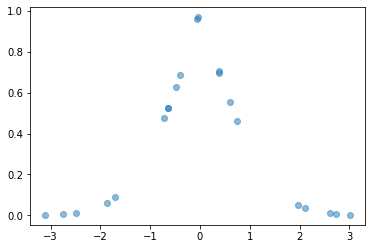

,statistic,pvalue
Africa-America,2.614989,0.008931
Africa-CentralAsiaSiberia,2.108067,0.035040
Africa-EastAsia,3.006926,0.002643
Africa-Oceania,1.966577,0.049248
Africa-SouthAsia,2.729033,0.006358
Africa-WestEurasia,0.593266,0.553011
America-CentralAsiaSiberia,-0.639712,0.522368
America-EastAsia,-0.052571,0.958074
America-Oceania,-0.639201,0.522701
America-SouthAsia,-0.401196,0.688281


In [39]:
#### ADD pair-population names #####    
combination_names = []
for i in list(combinations(mean_cnv.index,2)):
        combination_names.append(i[0]+str('-')+i[1])

ttest_df = pd.DataFrame(result_ttest)

ttest_df = ttest_df.set_axis(combination_names) 
ttest_df.columns = ['statistic', 'pvalue']
#ttest_df = ttest_df.sort_values(by='pvalue')


plt.scatter(ttest_df['statistic'], ttest_df['pvalue'], alpha=0.5)
plt.show()

ttest_df


<h2> Computing permutation for each pair-group with means only

In [19]:
pV = []
gt = []
for i in combination_regions:
    #Ground truth
    gT = np.abs(np.average(mean_cnv.iloc[i[0]]) - np.average(mean_cnv.iloc[i[1]]))
    
    gt.append(gT)
    
    pV.append(list(mean_cnv.iloc[i[0]]) + list(mean_cnv.iloc[i[1]]))

np.shape(pV)

(21, 17300)

In [20]:
import copy
import random

po = []
pS = copy.copy(pV)
for pair in range(21):
    pD = []
    p=1000
    for i in range(0,p):
        random.shuffle(pS[pair])
        pD.append(np.abs(np.average(pS[pair][0:int(len(pS[pair])/2)]) - np.average(pS[pair][int(len(pS[pair])/2):])))
    po.append(pD)

In [29]:
p_val_permutation = []
for i in range(21):
    p_val = len(np.where(po[i]>=gt[i])[0])/p
    p_val_permutation.append(p_val)
    


In [40]:
permutation = pd.DataFrame(p_val_permutation)
permutation = permutation.set_axis(combination_names) 
permutation.columns = ['pvalue_permutation']

In [41]:
pd.concat([ttest_df, permutation], axis=1)

,statistic,pvalue,pvalue_permutation
Africa-America,2.614989,0.008931,0.000
Africa-CentralAsiaSiberia,2.108067,0.035040,0.000
Africa-EastAsia,3.006926,0.002643,0.000
Africa-Oceania,1.966577,0.049248,0.005
Africa-SouthAsia,2.729033,0.006358,0.000
Africa-WestEurasia,0.593266,0.553011,0.555
America-CentralAsiaSiberia,-0.639712,0.522368,0.529
America-EastAsia,-0.052571,0.958074,0.960
America-Oceania,-0.639201,0.522701,0.499
America-SouthAsia,-0.401196,0.688281,0.738


<h2> Computing permutation for each pair-group whole samples

In [10]:
####### Groupby regions #######
dt_group = dt.groupby('10-Region')

dt_groupped = []
regions = anotation['10-Region'].unique()
for i in regions:
    dt_groupped.append(dt_group.get_group(str(i)))


In [11]:
def variance_gt(x, y):
    return np.var(x, axis=0) - np.var(y, axis=0)

In [35]:
def mean_gt(x, y):
    return np.mean(x, axis=0) - np.mean(y, axis=0)

In [24]:
from stattools.resampling import PermutationTest
PermutationTest

stattools.resampling.permutation.PermutationTest

In [25]:
pt = PermutationTest(dt_group.get_group(str('Africa'))[2], dt_group.get_group(str('America'))[2], stat=variance_gt, n_perm=9999)

In [26]:
p_value_ = pt.p_value()
print(f"p-value: {p_value_:.4f}")

p-value: 0.4205


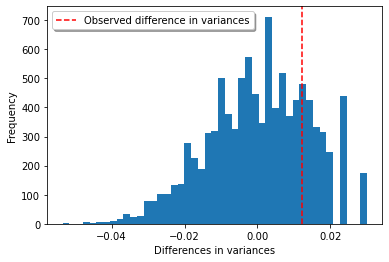

In [27]:
plt.figure()
plt.hist(pt.dist, bins="auto")
plt.axvline(pt.observed, c="r", ls="--", label="Observed difference in variances")
plt.legend(loc="best", frameon=True, shadow=True)
plt.xlabel("Differences in variances")
plt.ylabel("Frequency")
plt.show()
plt.close()

<h2> I ran this as a job cause takes a while (~12 hrs)

In [36]:

p_value_permutation = []

combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for region in combination_regions:
    
    p_value= []
    p_value_permutation.append(p_value)
    for i in range(10):
        permutation = PermutationTest(dt_groupped[region[0]][i], dt_groupped[region[1]][i], stat=mean_gt, n_perm=9999)
        p_value.append(permutation.p_value())

In [37]:
names = []
regions = dt['10-Region'].unique()
for i in list(combinations(regions,2)):
    names.append(i[0]+str('-')+i[1])


In [38]:
permutation_df = pd.DataFrame(p_value_permutation)
permutation_df = permutation_df.set_axis(names)
permutation_df

,0,1,2,3,4,5,6,7,8,9
WestEurasia-SouthAsia,0.9492,0.3607,0.4442,0.5480,0.7541,0.1105,0.2977,0.7245,0.7708,0.1797
WestEurasia-Africa,0.3513,0.0017,0.0205,1.0000,1.0000,1.0000,1.0000,0.3757,0.3661,0.7906
WestEurasia-CentralAsiaSiberia,0.1261,0.9226,0.3050,0.1211,0.7135,0.2704,0.2681,0.2617,0.2704,0.9112
WestEurasia-Oceania,0.0735,0.3761,0.2078,1.0000,0.8079,1.0000,0.2489,0.2436,1.0000,0.4164
WestEurasia-America,0.4667,0.0679,0.0557,1.0000,0.2335,1.0000,0.2289,1.0000,0.2156,0.4053
WestEurasia-EastAsia,0.9234,0.8658,0.4769,0.2989,0.5630,0.1461,0.0545,0.3803,0.7643,0.7680
SouthAsia-Africa,0.4161,0.0002,0.0054,0.2222,0.6151,0.2088,0.3591,0.8671,1.0000,0.2361
SouthAsia-CentralAsiaSiberia,0.1561,0.5405,0.1101,0.4974,0.8569,0.8548,0.6561,0.6586,0.7510,0.1492
SouthAsia-Oceania,0.1085,0.9594,0.1235,0.5245,0.7604,0.7581,0.6651,0.9052,1.0000,0.1352
SouthAsia-America,0.5337,0.0395,0.0168,0.7615,0.6151,0.7694,0.6816,0.7830,0.7681,0.1294


In [39]:
results_permutation = pd.read_csv("permutation_results.csv", index_col=0)


In [21]:
filter = ((results_permutation<=0.05)).any()
sub_df = results_permutation.loc[: , filter]

In [22]:
sub_df<-

,0,1,3,10,11,19,20,25,31,33,...,8631,8632,8634,8636,8642,8643,8645,8646,8647,8649
WestEurasia-SouthAsia,0.5761,0.4426,0.8152,0.6387,0.2576,1.0000,0.1567,0.4931,0.6101,1.0000,...,1.0000,0.7996,0.2118,0.0212,0.4949,0.7463,1.0000,0.5613,0.6243,0.5114
WestEurasia-Africa,0.1736,0.0136,0.7261,0.4251,0.5120,0.0248,0.1000,0.0730,0.9196,0.0062,...,0.0210,0.0093,0.0158,0.0095,0.1633,0.2584,0.0908,0.2247,0.2843,0.2789
WestEurasia-CentralAsiaSiberia,0.1373,0.2614,0.0845,0.2358,0.3656,1.0000,0.7254,0.4314,0.8349,1.0000,...,0.2559,0.0614,0.3505,0.0049,0.8879,0.8848,0.8021,0.4154,0.3800,0.8930
WestEurasia-Oceania,0.0062,0.7773,0.6702,0.6352,0.4024,1.0000,0.2896,0.4156,0.3728,1.0000,...,1.0000,0.2385,0.3089,0.9200,0.3165,0.5285,0.8169,0.0936,0.0835,0.0546
WestEurasia-America,0.3210,0.2324,0.6714,0.0399,0.8060,1.0000,0.7480,0.3987,0.0273,1.0000,...,0.2257,0.0002,0.2153,0.0374,0.2266,0.0593,0.8293,0.6293,0.5839,0.4724
WestEurasia-EastAsia,0.9248,0.8129,0.2759,0.7394,0.9224,1.0000,0.8859,0.5168,0.1933,1.0000,...,0.1044,0.0001,0.0328,0.0997,0.5564,0.8231,0.5183,0.3790,0.3415,0.8366
SouthAsia-Africa,0.4308,0.0001,0.1230,0.7669,0.0582,0.5048,0.9440,0.2740,0.6628,0.0616,...,0.5160,0.0998,0.0822,0.9275,0.4339,0.4298,0.2294,0.7007,0.7069,0.8304
SouthAsia-CentralAsiaSiberia,0.3073,0.8843,0.4181,0.4978,0.9752,1.0000,0.0362,1.0000,0.7979,1.0000,...,0.3889,0.1614,1.0000,0.8044,0.4719,0.7804,1.0000,0.2683,0.2616,0.7300
SouthAsia-Oceania,0.0009,0.7598,0.5884,0.9663,0.0466,1.0000,0.7995,1.0000,0.7027,1.0000,...,1.0000,0.3683,0.0500,0.0689,0.9510,0.9530,1.0000,0.0012,0.0009,0.0040
SouthAsia-America,0.1905,0.1273,0.5854,0.1365,0.1098,1.0000,0.2604,1.0000,0.0841,1.0000,...,0.3572,0.0002,0.2947,0.7332,0.0804,0.0878,1.0000,0.4051,0.4035,0.9851


In [40]:
(results_permutation<=0.05).any()

0        True
1        True
2       False
3        True
4       False
        ...  
8645     True
8646     True
8647     True
8648    False
8649     True
Length: 8650, dtype: bool

In [50]:
for i,row in results_permutation.iterrows():
    print(i.split("-")[1])

SouthAsia
Africa
CentralAsiaSiberia
Oceania
America
EastAsia
Africa
CentralAsiaSiberia
Oceania
America
EastAsia
CentralAsiaSiberia
Oceania
America
EastAsia
Oceania
America
EastAsia
America
EastAsia
EastAsia


In [58]:
for i,row in results_permutation.iterrows():
    print(row[800])
    #print((row<=0.05).any())
    

0.9325
0.3499
0.9244
0.8816
0.7504
0.7954
0.4885
0.8815
0.8719
0.8546
0.8877
0.5689
0.7046
0.3948
0.4321
0.9532
0.7120000000000001
0.785
0.7517
0.7772
0.9439
